In [2]:
! pip install mtcnn
%cd /content/drive/MyDrive/PaperWorks/SCI


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 39.7 MB/s 
/content/drive/MyDrive/PaperWorks/SCI


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Github Commands Don't run unless committing

/content/drive/MyDrive/PaperWorks/SCI


In [ ]:
#to add files
!git add *
#!git status
!git config --global user.name "Antil"
!git config --global user.email ,!git remote add origin https://{git_token}@github.com/{username}/{repo}.git
!git remote -v


In [ ]:
!git add *

In [ ]:
!git commit -a -m 'Added Protocols File'


[master 0334d4d] Added Protocols File
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite SCI_Code.ipynb (94%)


In [ ]:
!git push -u origin master


Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 10.95 KiB | 2.19 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 1 local object.
To https://github.com/DrAntil/SCI.git
   b56462f..0334d4d  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


***#IMPORTING ALL REQUIRED FILES***

In [3]:
from __future__ import print_function
from __future__ import absolute_import

from keras.preprocessing import image
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm as log_progress
import pandas as pd
import numpy as np
import time
import random
import os
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf

import warnings
import numpy as np

from keras.preprocessing import image
from keras.utils import data_utils
from keras.models import Model
from keras import layers
from keras.models import Sequential
from keras.layers import *
import os
import pandas  as pd
from keras.utils.vis_utils import plot_model
def model_photu(model,n=True,expand=False,direct='TB',shapes=True):
   return plot_model(model, to_file='model_plot.png', show_shapes=shapes, show_layer_names=n,expand_nested=expand,rankdir=direct)
#from keras.engine.topology import get_source_inputs
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
#from keras.applications.imagenet_utils import _obtain_input_shape
from tensorflow.python.keras.layers import Layer, InputSpec
#from keras.applications.imagenet_utils import _obtain_input_shape
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +    'haarcascade_frontalface_default.xml')
from mtcnn.mtcnn import MTCNN
from keras.layers.merge import concatenate


In [4]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


***# DEFINING FUNCTION FOR GENERAL ELBP, SLICING 4 , SLICING 16***

In [5]:
# Default LBP finder 
def tf_loader(path,radi):
    img_list=tf.unstack(path)
    hists=[]
    for img_org in img_list:
     
        img_org=img_org*255
        #print('Squeese '+str(img_org.shape))
        [Rows,Cols]=[img_org.shape[0],img_org.shape[1]]
        if radi==53:
            yTf  = tf_lbp_53_(img_org.reshape(1,Rows,Cols).astype('uint8')).numpy()
        else:
            yTf  = tf_lbp_35_(img_org.reshape(1,Rows,Cols).astype('uint8')).numpy()
        
        face_list.append(yTf)
        face_titles.append('Full face')
        hist,p= np.histogram(yTf.reshape(1,yTf.shape[1]*yTf.shape[2]),bins=range(0,256,31))
        hists.append(tf.convert_to_tensor(hist,dtype='float32'))
        
    batched=tf.stack(hists)
#    print("full "+str(batched.shape))
    return batched
    

# dividing full image into 4*4 region (level-2)

def sliceBy16(path,radi):
    img_list=tf.unstack(path)
    hists=[]
    for img_org in img_list:
        img_org=img_org*255
        [H,w]=[img_org.shape[0],img_org.shape[1]]
        # 4 slices , one at evry 0.25 of height and width
        roi_00=img_org[           :int(H*0.25),           :int(w*0.25),:]
        roi_10=img_org[           :int(H*0.25),int(w*.25 ):int(w*0.5 ),:]
        roi_20=img_org[           :int(H*0.25),int(w*0.5 ):int(w*0.75),:]
        roi_30=img_org[           :int(H*0.25),int(w*0.75):           ,:]
        roi_01=img_org[int(H*0.25):int(H*0.5 ),           :int(w*0.25),:]
        roi_11=img_org[int(H*0.25):int(H*0.5 ),int(w*.25 ):int(w*0.5 ),:]
        roi_21=img_org[int(H*0.25):int(H*0.5 ),int(w*0.5 ):int(w*0.75),:]
        roi_31=img_org[int(H*0.25):int(H*0.5 ),int(w*0.75):           ,:]
        roi_02=img_org[int(H*0.5 ):int(H*0.75),           :int(w*0.25),:]
        roi_12=img_org[int(H*0.5 ):int(H*0.75),int(w*.25 ):int(w*0.5 ),:]
        roi_22=img_org[int(H*0.5 ):int(H*0.75),int(w*0.5 ):int(w*0.75),:]
        roi_32=img_org[int(H*0.5 ):int(H*0.75),int(w*0.75):           ,:]
        roi_03=img_org[int(H*0.75):      ,           :int(w*0.25)     ,:]
        roi_13=img_org[int(H*0.75):      ,int(w*.25 ):int(w*0.5 )     ,:]
        roi_23=img_org[int(H*0.75):      ,int(w*0.5 ):int(w*0.75)     ,:]
        roi_33=img_org[int(H*0.75):      ,int(w*0.75):                ,:]
    
    
        # img
        if radi==53:
            yTf_00  = tf_lbp_53_(roi_00)
            yTf_10  = tf_lbp_53_(roi_10)
            yTf_20  = tf_lbp_53_(roi_20)
            yTf_30  = tf_lbp_53_(roi_30)
            yTf_01  = tf_lbp_53_(roi_01)
            yTf_11  = tf_lbp_53_(roi_11)
            yTf_21  = tf_lbp_53_(roi_21)
            yTf_31  = tf_lbp_53_(roi_31)
            yTf_02  = tf_lbp_53_(roi_02)
            yTf_12  = tf_lbp_53_(roi_12)
            yTf_22  = tf_lbp_53_(roi_22)
            yTf_32  = tf_lbp_53_(roi_32)
            yTf_03  = tf_lbp_53_(roi_03)
            yTf_13  = tf_lbp_53_(roi_13)
            yTf_23  = tf_lbp_53_(roi_23)
            yTf_33  = tf_lbp_53_(roi_33)
        else:
            yTf_00  = tf_lbp_35_(roi_00)
            yTf_10  = tf_lbp_35_(roi_10)
            yTf_20  = tf_lbp_35_(roi_20)
            yTf_30  = tf_lbp_35_(roi_30)
            yTf_01  = tf_lbp_35_(roi_01)
            yTf_11  = tf_lbp_35_(roi_11)
            yTf_21  = tf_lbp_35_(roi_21)
            yTf_31  = tf_lbp_35_(roi_31)
            yTf_02  = tf_lbp_35_(roi_02)
            yTf_12  = tf_lbp_35_(roi_12)
            yTf_22  = tf_lbp_35_(roi_22)
            yTf_32  = tf_lbp_35_(roi_32)
            yTf_03  = tf_lbp_35_(roi_03)
            yTf_13  = tf_lbp_35_(roi_13)
            yTf_23  = tf_lbp_35_(roi_23)
            yTf_33  = tf_lbp_35_(roi_33)
        
        hs=[]
        # histograms are one D, reshape h,w,1   to 1,h*w
        hist,p= np.histogram(yTf_00.reshape(1,yTf_00.shape[1]*yTf_00.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_10.reshape(1,yTf_10.shape[1]*yTf_10.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_20.reshape(1,yTf_20.shape[1]*yTf_20.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_30.reshape(1,yTf_30.shape[1]*yTf_30.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_01.reshape(1,yTf_01.shape[1]*yTf_01.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_11.reshape(1,yTf_11.shape[1]*yTf_11.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_21.reshape(1,yTf_21.shape[1]*yTf_21.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_31.reshape(1,yTf_31.shape[1]*yTf_31.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_02.reshape(1,yTf_02.shape[1]*yTf_02.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_12.reshape(1,yTf_12.shape[1]*yTf_12.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_22.reshape(1,yTf_22.shape[1]*yTf_22.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_32.reshape(1,yTf_32.shape[1]*yTf_32.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_03.reshape(1,yTf_03.shape[1]*yTf_03.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_13.reshape(1,yTf_13.shape[1]*yTf_13.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_23.reshape(1,yTf_23.shape[1]*yTf_23.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hist,p= np.histogram(yTf_33.reshape(1,yTf_33.shape[1]*yTf_33.shape[2]),bins=range(0,256,31));   hs=np.append(hs,hist)
        hists.append(tf.convert_to_tensor(hs,dtype='float32'))
        #print('hists');print(hists)
        
    batched=tf.stack(hists)
#    print("16 "+str(batched.shape))

    return batched

def sliceBy4(path,radi):
    #img_org =image.load_img(path,target_size=(299,299,1),color_mode='grayscale')
    #img_org=image.img_to_array(img_org)
    #print('Enter by 4 '+str(radi))
    img_list=tf.unstack(path)
    hists=[]
    for img_org in img_list:
        img_org=img_org*255 
        [H,w]=[img_org.shape[0],img_org.shape[1]]
        
        roi_00=img_org[:int(H*0.5),:int(w*0.5),:]
        roi_01=img_org[int(H*0.5):,:int(w*0.5),:]
        roi_10=img_org[:int(H*0.5),int(w*0.5):,:]
        roi_11=img_org[int(H*0.5):,int(w*0.5):,:]
        if radi==53:
            yTf_00  = tf_lbp_53_(roi_00)
            yTf_01  = tf_lbp_53_(roi_01)
            yTf_10  = tf_lbp_53_(roi_10)
            yTf_11  = tf_lbp_53_(roi_11)
        else:
            yTf_00  = tf_lbp_35_(roi_00)
            yTf_01  = tf_lbp_35_(roi_01)
            yTf_10  = tf_lbp_35_(roi_10)
            yTf_11  = tf_lbp_35_(roi_11)
        hs=[]
        hist,p= np.histogram(yTf_00.reshape(1,yTf_00.shape[1]*yTf_00.shape[2]),bins=range(0,256,31)) ;   hs=np.append(hs,hist)   
        hist,p= np.histogram(yTf_01.reshape(1,yTf_01.shape[1]*yTf_01.shape[2]),bins=range(0,256,31)) ;   hs=np.append(hs,hist)   
        hist,p= np.histogram(yTf_10.reshape(1,yTf_10.shape[1]*yTf_10.shape[2]),bins=range(0,256,31)) ;   hs=np.append(hs,hist)   
        hist,p= np.histogram(yTf_11.reshape(1,yTf_11.shape[1]*yTf_11.shape[2]),bins=range(0,256,31)) ;   hs=np.append(hs,hist)
        hists.append(tf.convert_to_tensor(hs,dtype='float32'))
        #print('hists');print(hists)
        
    batched=tf.stack(hists)
 #   print("04 "+str(batched.shape))

    return batched    
        

# elbp for 5,3 --- general function for elbp--- calling function

def tf_lbp_53_(img):    
    # reshape to channel,hieght width
    img=img.reshape(1,img.shape[0],img.shape[1]).astype('uint8')
    paddings = tf.constant([[0,0],[3, 3], [5, 5]])
   # print('original shape '+str(img.shape))
    img=tf.pad(img, paddings,"CONSTANT")        
    b=img.shape 
    #print('padded shape '+str(img.shape))
    
  
    Y=b[1]
    X=b[2]
    #print('Y= '+str(Y)+'  X ='+str(X))
    img_padded=img
    #select the pixels of masks in the form of matrices
  
    i00=img_padded[:,0:Y-6, 2:X-8] #T-left
    i01=img_padded[:,0:Y-6, 5:X-5] #T-mid
    i02=img_padded[:,0:Y-6, 8:X-2] #T-right     
    i10=img_padded[:,3:Y-3, 0:X-10] #left
    i11=img_padded[:,3:Y-3, 5:X-5]  # center /threshold
    i12=img_padded[:,3:Y-3, 10:]    # right
    i20=img_padded[:,6: , 2:X-8] #R-left
    i21=img_padded[:,6: , 5:X-5] #R-mid
    i22=img_padded[:,6: , 8:X-2] #R-right
    g=tf.greater_equal(i01,i11)
    z=   tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(1,dtype='uint8') )      
    # 2 ---------------------------------
    g=tf.greater_equal(i02,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(2,dtype='uint8') )
    z =tf.add(z,tmp)              
    # 3 ---------------------------------
    g=tf.greater_equal(i12,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(4,dtype='uint8') )
    z =tf.add(z,tmp)
    # 4 ---------------------------------
    g=tf.greater_equal(i22,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(8,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 5 ---------------------------------
    g=tf.greater_equal(i21,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(16,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 6 ---------------------------------
    g=tf.greater_equal(i20,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(32,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 7 ---------------------------------
    g=tf.greater_equal(i10,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(64,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 8 ---------------------------------
    g=tf.greater_equal(i00,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'), tf.constant(128,dtype='uint8') )
    z =tf.add(z,tmp)  
    #---------------------------------    
    return tf.cast(z,dtype=tf.uint8).numpy()




# elbp for 3,5 --- general function for elbp--- calling function

def tf_lbp_35_(img):    
    img=img.reshape(1,img.shape[0],img.shape[1]).astype('uint8')
    
    paddings = tf.constant([[0,0],[5,5], [3, 3]])
    #print('original shape '+str(img.shape))
    img=tf.pad(img, paddings,"CONSTANT")        
    b=img.shape 
    #print('padded shape '+str(img.shape))
    
  
    Y=b[1]
    X=b[2]
   # print('Y= '+str(Y)+'  X ='+str(X))
    img_padded=img
    #select the pixels of masks in the form of matrices
  
    i00=img_padded[:, 2:Y-8 ,0:X-6] #T-left
    i01=img_padded[:, 5:Y-5 ,0:X-6] #T-mid
    i02=img_padded[:, 8:Y-2 ,0:X-6] #T-right     
    i10=img_padded[:, 0:Y-10,3:X-3] #left
    i11=img_padded[:, 5:Y-5 ,3:X-3]  # center /threshold
    i12=img_padded[:,10:    ,3:X-3]    # right
    i20=img_padded[:, 2:Y-8 ,6:   ] #R-left
    i21=img_padded[:, 5:Y-5 ,6:   ] #R-mid
    i22=img_padded[:, 8:Y-2 ,6:   ] #R-right
    g=tf.greater_equal(i01,i11)
    z=   tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(1,dtype='uint8') )      
    # 2 ---------------------------------
    g=tf.greater_equal(i02,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(2,dtype='uint8') )
    z =tf.add(z,tmp)              
    # 3 ---------------------------------
    g=tf.greater_equal(i12,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(4,dtype='uint8') )
    z =tf.add(z,tmp)
    # 4 ---------------------------------
    g=tf.greater_equal(i22,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(8,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 5 ---------------------------------
    g=tf.greater_equal(i21,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(16,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 6 ---------------------------------
    g=tf.greater_equal(i20,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(32,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 7 ---------------------------------
    g=tf.greater_equal(i10,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'),tf.constant(64,dtype='uint8') )
    z =tf.add(z,tmp)  
    # 8 ---------------------------------
    g=tf.greater_equal(i00,i11)
    tmp= tf.multiply(tf.cast(g,dtype='uint8'), tf.constant(128,dtype='uint8') )
    z =tf.add(z,tmp)  
    #---------------------------------    
    return tf.cast(z,dtype=tf.uint8).numpy()


In [6]:

def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)

           
           
        return Avg 



***# USING ELBP FUNCTION AS LAYERS IN KERAS***

In [7]:
class ComputeLBP_full_53(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeLBP_full_53, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(8,dtype='uint8'), trainable=False)

    def call(self, inputs):
        
        
        hist= tf.py_function( tf_loader, 
                           [inputs,53],
                           'float32')
        
        self.LBP_features=tf.cast(tf.reshape(hist,[-1,8]), tf.float32)
        return self.LBP_features
    def get_config(self):

        config = super().get_config().copy()
        return config

# Reference : https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_hsv    
class GrayMaker(keras.layers.Layer):
    def __init__(self, input_dim):
        super(GrayMaker, self).__init__()
        self.Gray = tf.Variable(initial_value=tf.zeros([299,299,1],dtype='float32'), trainable=False)

    def call(self, inputs):
        
        
        G= tf.image.rgb_to_grayscale(inputs)
        self.Gray=G
        
        return self.Gray
    def get_config(self):

        config = super().get_config().copy()
        return config
class V_extractor(keras.layers.Layer):
    def __init__(self, input_dim):
        super(V_extractor, self).__init__()
        self.V_channel = tf.Variable(initial_value=tf.zeros([299,299,1],dtype='float32'), trainable=False)

    def call(self, inputs):     
      
        G= tf.image.rgb_to_hsv(inputs)
        v2=tf.expand_dims(G[:,:,:,2], 3)
        self.V_channel=v2
        return self.V_channel
    def get_config(self):

        config = super().get_config().copy()
        return config
        

class ComputeLBP_4_53(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeLBP_4_53, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(32,dtype='uint8'), trainable=False)

    def call(self, inputs):
        
        hs= tf.py_function( sliceBy4, 
                           [inputs,53],
                           'float32')   
        
        self.LBP_features=tf.cast(tf.reshape(hs,[-1,32]), tf.float32)
        return self.LBP_features
    def get_config(self):

        config = super().get_config().copy()
        return config
    
class ComputeLBP_16_53(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeLBP_16_53, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(128,dtype='uint8'), trainable=False)

    def call(self, inputs):
        hs= tf.py_function( sliceBy16, 
                           [inputs,53],
                           'float32') 
        
        self.LBP_features=tf.cast(tf.reshape(hs,[-1,128]), tf.float32)
        return self.LBP_features
    def get_config(self):

        config = super().get_config().copy()
        return config
    
class ComputeLBP_full_35(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeLBP_full_35, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(8,dtype='uint8'), trainable=False)
    def get_config(self):

        config = super().get_config().copy()
        return config
    def call(self, inputs):
        #print(inputs)
        hist= tf.py_function( tf_loader,[inputs,35],
                           'float32')
        
        self.LBP_features=tf.cast(tf.reshape(hist,[-1,8]), tf.float32)
        return self.LBP_features


class ComputeLBP_4_35(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeLBP_4_35, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(32,dtype='uint8'), trainable=False)
    def get_config(self):

        config = super().get_config().copy()
        return config
    
    def call(self, inputs):
        
        hs= tf.py_function( sliceBy4, 
                           [inputs,35],
                           'float32') 
        
        self.LBP_features=tf.cast(tf.reshape(hs,[-1,32]), tf.float32)

        return self.LBP_features

class ComputeLBP_16_35(keras.layers.Layer):
    
    def __init__(self, input_dim):
        super(ComputeLBP_16_35, self).__init__()
        self.LBP_features = tf.Variable(initial_value=tf.zeros(128,dtype='uint8'), trainable=False)
    def get_config(self):

        config = super().get_config().copy()
        return config
    
    def call(self, inputs):
        hs= tf.py_function( sliceBy16, 
                           [inputs,35],
                           'float32') 
        self.LBP_features=tf.cast(tf.reshape(hs,[-1,128]), tf.float32)
        return self.LBP_features
    
class FacePlate(keras.layers.Layer):
    
    def __init__(self, input_dim):
        super(FacePlate, self).__init__()
        self.Faces = tf.Variable(initial_value=tf.zeros(input_dim), trainable=False)
    def get_config(self):

        config = super().get_config().copy()
        return config
    
    def call(self, inputs):
        #print('in Faceplae')
        hs= tf.py_function( getFace,                            [inputs],                           'float32') 
        #print(inputs.shape)
        #print('Faceplate'+str(hs.shape))
        self.Faces=tf.cast(tf.reshape(hs,[-1,100,100,3]), tf.float32)
        return self.Faces
        

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=3, figsize=(20, 10), title_fontsize=10,show_titles=False):
    num_images  = len(list_images)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   =  'gray'
        
        list_axes[i].imshow(img, cmap=cmap)
        
        
        
        if(show_titles):
            list_axes[i].set_title(title, fontsize=title_fontsize) 
        #list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    plt.axis('off')

    _ = plt.show()


In [8]:

g=[]
debugs=[]
def getFace(img):
    global g
    frames=[]
    for frame in img:
        debugs.append(str(frame.shape))
        #print(frame.shape)
        f=getFace1(frame)
        frames.append(f)
#        g.append(f)   
    #print('batch done')  
    f_s=tf.Variable(initial_value=tf.zeros((100,100,3),dtype= 'float32'), trainable=False)
    i=0;
    f_s=tf.stack(frames)
    #print(f_s.shape)

    return f_s

In [9]:
face_list=[]
face_titles=[]
def getFace1(im):
        global face_list
        #face_list.append(face_cropped)
        gray =float_to_Img(im.numpy())
        gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30)
        ) 
        try:
            if len(faces) == 0:
                    return im[0:100,0:100,:]
                    print('no face')
                    faces = detector.detect_faces(im.numpy())
                    if len(faces) == 0:
                                #face_list.append(im[0:100,0:100,:])
                                #face_titles.append('mtcnn empty')
                                return im[0:100,0:100,:]
                    x, y, w, h = faces[0]['box']
                    face_cropped=im[y-10:y+h+10,x-10:x+w+10,:]
                    
                    rescaled=cv2.resize((face_cropped.numpy()), [100,100], interpolation=cv2.INTER_AREA)
                    #face_list.append(rescaled)
                    #face_titles.append('mtcnn')               
                    return face_cropped
                    
                    
            #print(str(len(faces))+'  '+str(faces[0]))
            [x,y,w,h]=faces[0]
            face_cropped=im[y-10:y+h+10,x-10:x+w+10,:]
            rescaled=cv2.resize((face_cropped.numpy()), [100,100], interpolation=cv2.INTER_AREA)
            
            #face_list.append(rescaled)
            #face_titles.append('cropped face')
            
                
            return rescaled
        except :
            return im[0:100,0:100,:]

***# CONVERTING IMAGE NUMBERS INTO ACTUAL IMAGE***

In [10]:
def float_to_Img(ar):
    
    shape=ar.shape
    img = np.zeros([ar.shape[0],ar.shape[0],3],dtype='uint8')

    img[:,:,0] = ar[:,:,0]*255
    img[:,:,1] = ar[:,:,1]*255
    img[:,:,2] = ar[:,:,2]*255
    #plt.imshow(img)
    return img

***# DEFINING ACTUAL SQUEEZE EXCITATION FUNCTION***

In [11]:

def SqueezeAndExcitation(z,name1):
    b,h,w,c = z.shape
    ratio=16
    #squeeze
    y = keras.layers.GlobalAveragePooling2D(name=name1+'glob')(z) 
    #Excitation operation
    y= Dense(c//ratio, activation='relu',name=name1+'relu', use_bias= False)(y)
    y = keras.layers.Dense(c, activation='sigmoid', use_bias=False,name=name1+'sig')(y)
    y = keras.layers.multiply([z,y],name=name1)
    #y.name=name1
    return y  

***# LOADING SQUEEZE XCITATION MODEL SAVED IN PREVIOUS NOTEBOOK***

In [12]:
from keras.layers.merge import concatenate
def SE_Xception(include_top=False, weights='imagenet', input_shape=(299,299,3),input_tensor=None):
    
    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
       if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
       else:
          img_input = input_tensor
    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False, name='block1_conv1')(img_input)
    x = BatchNormalization(name='block1_conv1_bn')(x)
    x = Activation('relu', name='block1_conv1_act')(x)
    x = Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = BatchNormalization(name='block1_conv2_bn')(x)
    x = Activation('relu', name='block1_conv2_act')(x)

    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = BatchNormalization(name='block2_sepconv1_bn')(x)
    x = Activation('relu', name='block2_sepconv2_act')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = BatchNormalization(name='block2_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(256, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block3_sepconv1_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = BatchNormalization(name='block3_sepconv1_bn')(x)
    x = Activation('relu', name='block3_sepconv2_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = BatchNormalization(name='block3_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(728, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block4_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv1')(x)
    x = BatchNormalization(name='block4_sepconv1_bn')(x)
    x = Activation('relu', name='block4_sepconv2_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv2')(x)
    x = BatchNormalization(name='block4_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block4_pool')(x)
    x = layers.add([x, residual])
    # entry flow features to squeeze excitation block
    s=x
    # entry flow complete
    # middle flow starts

    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv1')(x)
        x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv2')(x)
        x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv3')(x)
        x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)
        
       
        x = layers.add([x, residual])

    f=x
    # middle flow endend---- add squeeze excitation block
        # exit flow starting
    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block13_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block13_sepconv1')(x)
    x = BatchNormalization(name='block13_sepconv1_bn')(x)
    x = Activation('relu', name='block13_sepconv2_act')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False, name='block13_sepconv2')(x)
    x = BatchNormalization(name='block13_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block13_pool')(x)
    x = layers.add([x, residual])

    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False, name='block14_sepconv1')(x)
    x = BatchNormalization(name='block14_sepconv1_bn')(x)
    x = Activation('relu', name='block14_sepconv1_act')(x)

    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False, name='block14_sepconv2')(x)
    x = BatchNormalization(name='block14_sepconv2_bn')(x)
    x = Activation('relu', name='block14_sepconv2_act')(x)
    

    if include_top:
          x = GlobalAveragePooling2D(name='avg_pool')(x)
          outputs = Dense(2, activation='softmax', name='predictions')(x)
    else:
         y=SqueezeAndExcitation(s,'Se1') #squeeze excitation to entry block
         z=SqueezeAndExcitation(f,'Se2') #squeeze excitation to middle flow
         q=SqueezeAndExcitation(x,'Se3')
         a= keras.layers.Flatten()(q)
        # print('y=',y)
         #print('z=',z)
        # print('q=',q)
    #concating features output from squeeze excitation block
         #d=SqueezeAndExcitation(layers.add([s,f]))
         d=layers.add([y,z])
        # print("d=",d)
         e= keras.layers.Flatten()(d)
         g=keras.layers.concatenate([a,e])
         #print("g=",g)
         p=keras.layers.Dense(512, activation='relu')(g)
         p=keras.layers.Dense(16,activation='relu')(p)
         outputs = keras.layers.Dense(2,activation='softmax')(p)

           #applying squeeze excitation at the ending block of exit
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    
    # Create model.
    model = Model(inputs, outputs, name='xception')
    if ( weights=='Casia' ) :
        model.load_weights('/content/drive/MyDrive/ML_Data/SE_Casia_Concat_weights.h5',by_name = True, skip_mismatch = True)
    else:
        model.load_weights('/content/drive/MyDrive/ML_Data/SE_Replay_Concat_weights.h5',by_name = True, skip_mismatch = True)

    # load weights
    
    return model

In [13]:
# weights defaults to replay attack 
loaded_model=SE_Xception()

In [ ]:
model_photu(loaded_model) 

***#DEFINING SINGLE INPUT FOR OVERALL COMBINED MODEL***

In [17]:
inputs_s = keras.Input(shape=(299, 299, 3))
inputs_s2 = keras.Input(shape=(299, 299, 3))

***# SQUEEZE-XCEPTION LAYERS DECLARED FALSE TO AVOID TRAINING OF MODEL AGAIN***

In [15]:
for l in loaded_model.layers:
    l.trainable=False
#loaded_model.summary()

***#STORING PRE-TRAINED SQUEEZE-XCEPTION MODEL IN NEW MODEL***

In [16]:
# slice Xception model and get only Dense parts 
# 
X_model= Model(inputs=loaded_model.input, outputs=loaded_model.layers[-3].output,name='Squeeze_Xception')
#X_model= Model(inputs=model_Replay.input, outputs=model_Replay.layers[-1].output,name='Squeeze_Xception')


In [ ]:
X_model.summary() # CHECKING SUMMARY

***# DECARING ELBP SUB MODEL FOR RGB IMAGES***

In [18]:
#common layer to get face data . this will pass the colored cropped face to ELBP and HSV generator
faceGetter=FacePlate(input_dim=(299,299,1))(inputs_s2)
#print(faceGetter)
#model for ELBP creation
iLBp=keras.Input(shape=(faceGetter.shape[1],faceGetter.shape[2],faceGetter.shape[3]))
#print(iLBp)
gray=GrayMaker(input_dim=iLBp.shape)(iLBp)

ELBP_Full_H=ComputeLBP_full_53(input_dim=gray.shape)(gray)
ELBP_Full_V=ComputeLBP_full_35(input_dim=gray.shape)(gray)

ELBP_by04_H=ComputeLBP_4_53   (input_dim=gray.shape)(gray)
ELBP_by04_V=ComputeLBP_4_35   (input_dim=gray.shape)(gray)

ELBP_by16_H=ComputeLBP_16_53  (input_dim=gray.shape)(gray)
ELBP_by16_V=ComputeLBP_16_35  (input_dim=gray.shape)(gray)

ELBP_full  =keras.layers.add([ELBP_Full_H,ELBP_Full_V],name='add_ELBP_full')
ELBP_by04  =keras.layers.add([ELBP_by04_H,ELBP_by04_V],name='add_ELBP_L1')
ELBP_by16  =keras.layers.add([ELBP_by16_H,ELBP_by16_V],name='add_ELBP_L2')

ELBP_Concated= keras.layers.concatenate([ELBP_full,ELBP_by04],name='all_lbp_concaterd')
#output=keras.layers.Dense(2)(ELBP_Concated)
LBP_container=keras.Model(iLBp,ELBP_Concated,name='ELBP')
#LBP_container=keras.Model(iLBp,ELBP_full,name='ELBP')

#LBP_container.compile(optimizer='adam', loss='binary_crossentropy',metrics="categorical_accuracy")

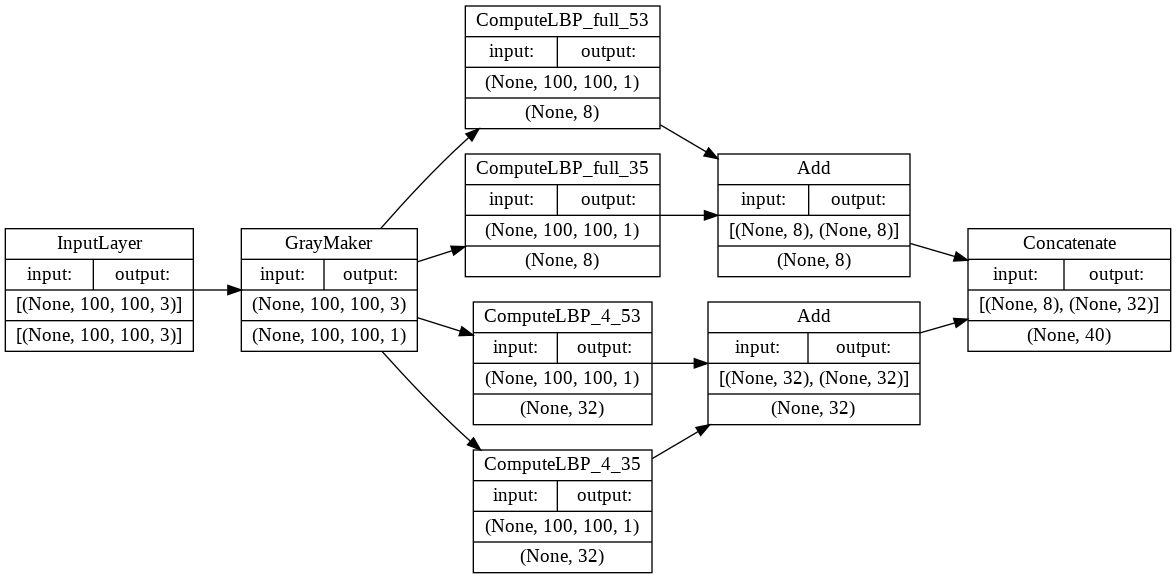

In [ ]:
model_photu(LBP_container,direct='LR',n=False)

In [ ]:
LBP_container.summary()

***# DECLARING ELBP FUNCTION FOR HSV IMAGES***

In [19]:
#model for V-channel ELBP creation

V_Chan=V_extractor(input_dim=iLBp.shape)(iLBp)


V_Chan_ELBP_Full_H = ComputeLBP_full_53(input_dim=V_Chan.shape)(V_Chan)
V_Chan_ELBP_Full_V = ComputeLBP_full_35(input_dim=V_Chan.shape)(V_Chan)

V_Chan_ELBP_by04_H = ComputeLBP_4_53   (input_dim=V_Chan.shape)(V_Chan)
V_Chan_ELBP_by04_V = ComputeLBP_4_35   (input_dim=V_Chan.shape)(V_Chan)

V_Chan_ELBP_by16_H = ComputeLBP_16_53  (input_dim=V_Chan.shape)(V_Chan)
V_Chan_ELBP_by16_V = ComputeLBP_16_35  (input_dim=V_Chan.shape)(V_Chan)

V_Chan_ELBP_full   = keras.layers.add([V_Chan_ELBP_Full_H,V_Chan_ELBP_Full_V],name='add_V_Chan_ELBP_full')
V_Chan_ELBP_by04   = keras.layers.add([V_Chan_ELBP_by04_H,V_Chan_ELBP_by04_V],name='add_V_Chan_ELBP_L1')
V_Chan_ELBP_by16   = keras.layers.add([V_Chan_ELBP_by16_H,V_Chan_ELBP_by16_V],name='add_V_Chan_ELBP_L2')

V_Chan_ELBP_Concated= keras.layers.concatenate([V_Chan_ELBP_full,V_Chan_ELBP_by04],name='all_V_Concat')
#output=keras.layers.Dense(2)(V_Chan_ELBP_Concated)
#L0 L1
V_Chan_LBP_container=keras.Model(iLBp,V_Chan_ELBP_Concated,name='V_Channel_ELBP')
#only l0
#V_Chan_LBP_container=keras.Model(iLBp,V_Chan_ELBP_full,name='V_Channel_ELBP')

#model_photu(V_Chan_LBP_container,direct='LR',n=False)

***# CONCATINATING SQUEEZE-XCEPTION OUTPUT WITH ELBP OUTPUT( HSV+RGB)***

In [20]:
#
#output of squeeze xception m.odel
x_out=X_model(inputs_s2,training=False)
#output of ELBP with face input
ELB_out=LBP_container(faceGetter)
# output of HSV with Face input
V_ELB_out=V_Chan_LBP_container(faceGetter)
# connect all
el_c=keras.layers.concatenate([ELB_out,V_ELB_out],axis=1,name='lbp_concat')
t=tf.keras.layers.Reshape((10, 8), name='lstm_')(el_c)
q=keras.layers.LSTM(64,return_sequences=True)(t)
q=keras.layers.LSTM(32)(q)
concat_all=keras.layers.concatenate([x_out,q],axis=1,name='lbp_concaterd')
p=keras.layers.Dense(256, activation='relu',name='e_dense_1')(concat_all)
p=keras.layers.Dense(64,activation='relu',name='e_dense_2')(p)
outputs = keras.layers.Dense(2,activation='sigmoid',name='e_dense_3')(p)
f_model=keras.Model(inputs_s2,outputs)
#f_model.compile(optimizer='adam', loss='binary_crossentropy',metrics="categorical_accuracy")

f_model.compile(optimizer='adam', loss='binary_crossentropy',metrics="categorical_accuracy",steps_per_execution=4)


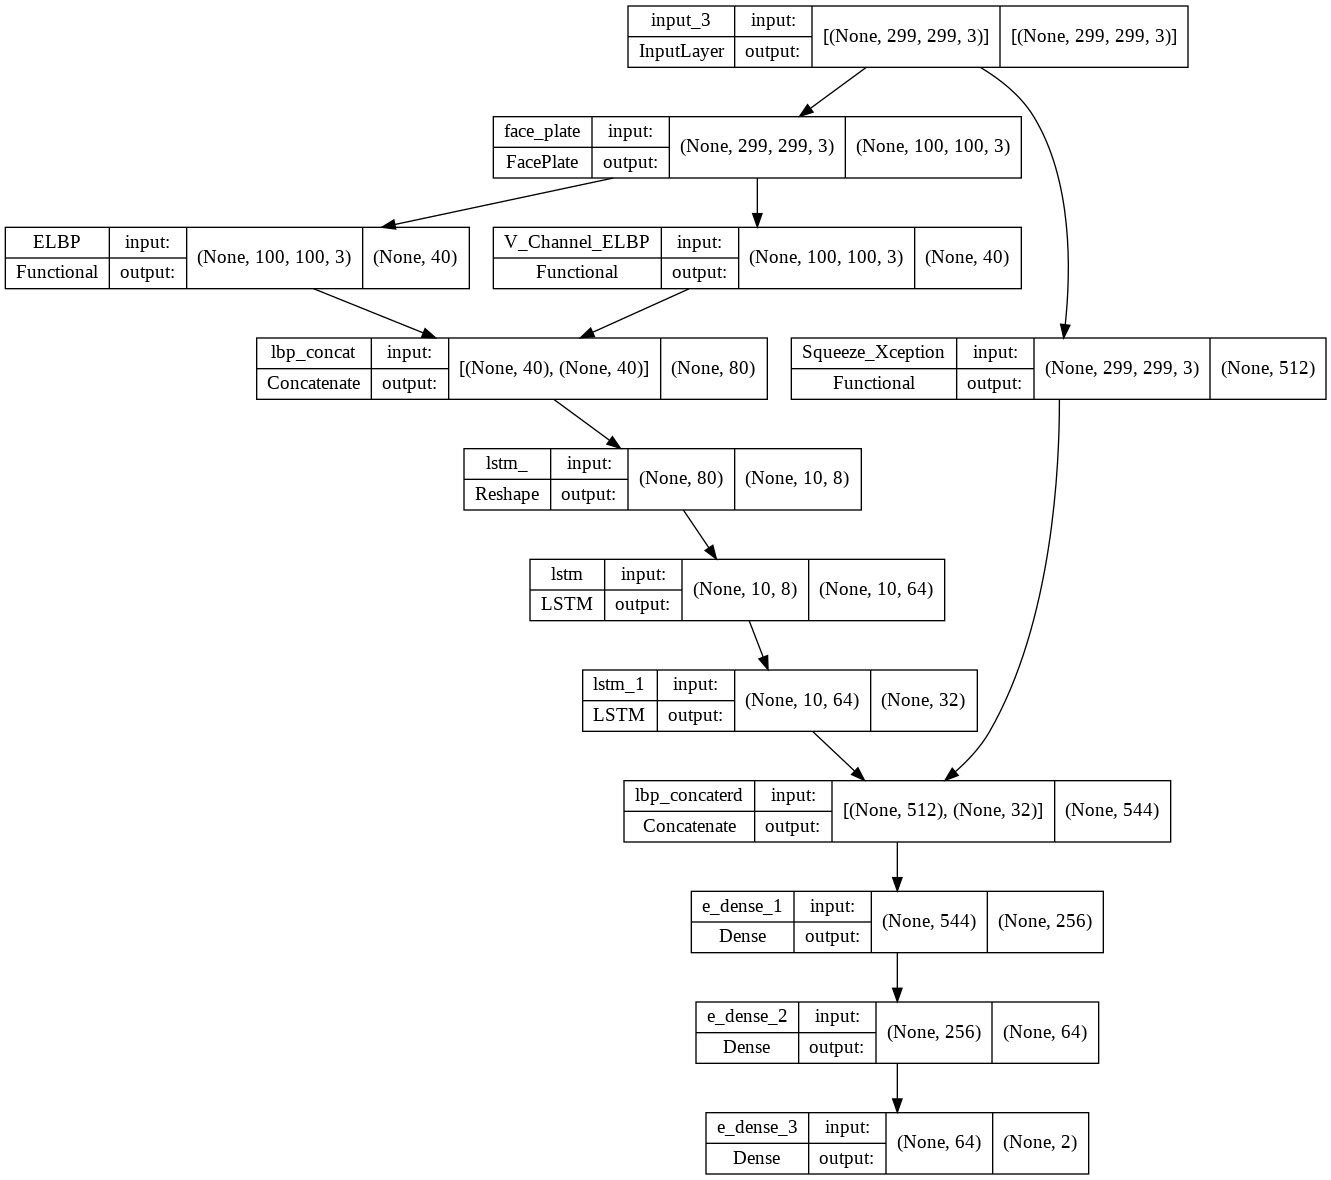

In [ ]:
model_photu(f_model,expand=False,direct='TB',shapes=True)

In [ ]:
f_model.summary()


In [ ]:
model_photu(f_model,expand=True,n=False,shapes=False)



**Replay Training and Testing**

In [ ]:
# training on replay-attack and testing replay-attack------------ intra-dataset( replay-1)

import os
train_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/replay_data_every_10th/train'
val_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/replay_data_every_10th/dev'
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data generator
train_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)
val_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)

train_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/Replay_train_rgb.csv')
# for half files
train_1=train_full.iloc[::2]
train_2=train_full.iloc[1::2]

dev_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/Replay_dev_rgb.csv')
dev_1=dev_full.iloc[::4]
dev_2=dev_full.iloc[1::4]

train_data_1 = train_gen.flow_from_dataframe(dataframe = train_1,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =16, shuffle = True, class_mode='categorical',target_size = (299,299))
train_data_2 = train_gen.flow_from_dataframe(dataframe = train_2,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =16, shuffle = True, class_mode='categorical',target_size = (299,299))


val_data_1 = val_gen.flow_from_dataframe(dataframe = dev_1, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 16, shuffle = False, class_mode= 'categorical',target_size = (299,299))
val_data_2 = val_gen.flow_from_dataframe(dataframe = dev_2, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 16, shuffle = False, class_mode= 'categorical',target_size = (299,299))


Found 4575 validated image filenames belonging to 2 classes.
Found 4575 validated image filenames belonging to 2 classes.
Found 2288 validated image filenames belonging to 2 classes.
Found 2288 validated image filenames belonging to 2 classes.


In [ ]:
f_model.summary()

In [ ]:
f_model.fit(train_data_1,epochs=1, validation_data=val_data_1, verbose = 1,use_multiprocessing = True, workers = 4)


286/286 [==============================] - 765s 3s/step - loss: 0.0167 - categorical_accuracy: 0.9941 - val_loss: 0.1614 - val_categorical_accuracy: 0.9467


In [ ]:
#RETRAIN

f_model.fit(train_data_2,epochs=2, validation_data=val_data_2, verbose = 1,use_multiprocessing = True, workers = 4)
f_model.save('/content/drive/MyDrive/ML_Data/SavedModels/Replay512_16_97')

Epoch 1/2
286/286 [==============================] - 751s 3s/step - loss: 0.0207 - categorical_accuracy: 0.9919 - val_loss: 0.0742 - val_categorical_accuracy: 0.9755
Epoch 2/2
286/286 [==============================] - 696s 2s/step - loss: 0.0042 - categorical_accuracy: 0.9989 - val_loss: 0.1669 - val_categorical_accuracy: 0.9615


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Data/SavedModels/Replay512_16_97/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_Data/SavedModels/Replay512_16_97/assets


In [ ]:
# Replay Training
f_model.fit(train_data_2,epochs=2, validation_data=val_data_2, verbose = 1)


Epoch 1/2
286/286 [==============================] - 2382s 8s/step - loss: 0.0326 - categorical_accuracy: 0.9906 - val_loss: 0.0645 - val_categorical_accuracy: 0.9744
Epoch 2/2
286/286 [==============================] - 779s 3s/step - loss: 0.0167 - categorical_accuracy: 0.9954 - val_loss: 0.0435 - val_categorical_accuracy: 0.9820


**Save Replay Model**

In [ ]:
f_model.save('/content/drive/MyDrive/ML_Data/SavedModels/Replay512_16_97')


***LOADING PRETRAINED MODEL***

Pass all custom functions to make sure the loaded model assigns weights corectly

In [ ]:


t_model=keras.models.load_model('/content/drive/MyDrive/ML_Data/SavedModels/Replay512_16_97',custom_objects={"getFace1"   :getFace1,
"getFace"    :getFace,
"tf_lbp_35_" :tf_lbp_35_,
"tf_lbp_53_" :tf_lbp_53_,
"sliceBy4"   :sliceBy4,
"tf_loader"  :tf_loader})

In [ ]:
#Assign Loaded weights to model

i=0
for layer in t_model.layers:
    print(layer.name, len(layer.get_weights ()))    
    try:
      f_model.layers[i].set_weights(layer.get_weights())
    except:
      print("err",layer.name)
    i=i+1
    
print(i)  

In [ ]:
test_gen= ImageDataGenerator(
rescale=1./255
)
replay_test_folder ='/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/replay_data_every_10th/test'
casia_test_folder='/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/casia-fasd-rgb/db_test'

In [ ]:
casia_test_set = test_gen.flow_from_directory(casia_test_folder,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)
replay_test_set = test_gen.flow_from_directory(replay_test_folder,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

In [ ]:
# Replay Intra test

preds=f_model.predict(replay_test_set,  verbose = 1, use_multiprocessing = True, workers = 4)
DF = pd.DataFrame(preds)
  
# save the dataframe as a csv file
DF.to_csv("/Results/Replay_L01_intra_result_mam.csv")

122/122 [==============================] - 446s 4s/step


In [ ]:
# Replay Inter test

preds=f_model.predict(casia_test_set,  verbose = 1, use_multiprocessing = True, workers = 4)
DF = pd.DataFrame(preds)
  
# save the dataframe as a csv file
DF.to_csv("/Results/Replay_L01_inter_result_mam.csv")

**CASIA TRAINING**

In [ ]:
# training on Casia and testing Casia------------ intra-dataset( replay-1)

import os
train_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/casia-fasd-rgb/db_train'
val_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/casia-fasd-rgb/db_test'
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data generator
train_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)
val_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)

train_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/casia_train.csv')
# for half files
train_1=train_full.iloc[::2]
train_2=train_full.iloc[1::2]
dev_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/casia_train.csv')
dev_1=dev_full.iloc[::5]
dev_2=dev_full.iloc[2::5]

train_data_1 = train_gen.flow_from_dataframe(dataframe = train_1,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =32, shuffle = True, class_mode='categorical',target_size = (299,299))
train_data_2 = train_gen.flow_from_dataframe(dataframe = train_2,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =32, shuffle = True, class_mode='categorical',target_size = (299,299))


val_data_1 = val_gen.flow_from_dataframe(dataframe = dev_1, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 32, shuffle = False, class_mode= 'categorical',target_size = (299,299))
val_data_2 = val_gen.flow_from_dataframe(dataframe = dev_2, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 32, shuffle = False, class_mode= 'categorical',target_size = (299,299))


In [ ]:
f_model.fit(train_data_1,epochs=1, validation_data=val_data_1, verbose = 1,use_multiprocessing = True, workers = 8)



**Save Casia Model**

In [ ]:

f_model.fit(train_data_2,epochs=2, validation_data=val_data_2, verbose = 1,use_multiprocessing=True,workers=10)


Epoch 1/2
546/546 [==============================] - 380s 696ms/step - loss: 0.0239 - categorical_accuracy: 0.9929 - val_loss: 0.5809 - val_categorical_accuracy: 0.8538
Epoch 2/2
546/546 [==============================] - 352s 645ms/step - loss: 0.0222 - categorical_accuracy: 0.9922 - val_loss: 0.4797 - val_categorical_accuracy: 0.8656


In [ ]:
f_model.save('/content/drive/MyDrive/ML_Data/SavedModels/Casia512_16_97')
f_model.save_weights('/content/drive/MyDrive/ML_Data/SavedModels/Casia512_16_97_weight.h5')

In [ ]:
# Casia Intra test

preds=f_model.predict(Casia_test_set,  verbose = 1, use_multiprocessing = True, workers = 4)
DF = pd.DataFrame(preds)
  
# save the dataframe as a csv file
DF.to_csv("/Results/Casia_L01_intra_result_mam.csv")

In [ ]:
# Casia Inter test

preds=f_model.predict(Replay_test_set,  verbose = 1, use_multiprocessing = True, workers = 4)
DF = pd.DataFrame(preds)
  
# save the dataframe as a csv file
DF.to_csv("/Results/Casia_L01_inter_result_mam.csv")

**OULU Protocol 1**

In [ ]:
#  OULU Protocol 1
#  

import os
train_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/OULU_frames/Train_Files'
val_folder = '/content/drive/MyDrive/ML_Data/Datasets_Preprocessed/OULU_frames/Dev_Files_frames'
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data generator
train_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)
val_gen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True
)

train_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/OULU_Train_Labels_P1.csv')
# for half files
train_1=train_full.iloc[::2]
train_2=train_full.iloc[1::2]
dev_full = pd.read_csv('/content/drive/MyDrive/ML_Data/Labels/OULU_Dev_Labels_P1.csv')
dev_1=dev_full.iloc[::5]
dev_2=dev_full.iloc[2::5]

train_data_1 = train_gen.flow_from_dataframe(dataframe = train_1,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =32, shuffle = True, class_mode='categorical',target_size = (299,299))
train_data_2 = train_gen.flow_from_dataframe(dataframe = train_2,directory = train_folder,  x_col = "filename", y_col = "label",batch_size =32, shuffle = True, class_mode='categorical',target_size = (299,299))


val_data_1 = val_gen.flow_from_dataframe(dataframe = dev_1, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 32, shuffle = False, class_mode= 'categorical',target_size = (299,299))
val_data_2 = val_gen.flow_from_dataframe(dataframe = dev_2, directory = val_folder, x_col = 'filename', y_col = 'label',batch_size = 32, shuffle = False, class_mode= 'categorical',target_size = (299,299))


Found 16389 validated image filenames belonging to 2 classes.
Found 16388 validated image filenames belonging to 2 classes.
Found 4915 validated image filenames belonging to 2 classes.
Found 4915 validated image filenames belonging to 2 classes.


In [ ]:
oulu_model=keras.Model(inputs_s2,outputs)
#f_model.compile(optimizer='adam', loss='binary_crossentropy',metrics="categorical_accuracy")

oulu_model.compile(optimizer='adam', loss='binary_crossentropy',metrics="categorical_accuracy",steps_per_execution=4)


In [ ]:
oulu_model.fit(train_data_1,epochs=2, validation_data=val_data_1, verbose = 1,use_multiprocessing=True,workers=4)


Epoch 1/2
513/513 [==============================] - 2721s 5s/step - loss: 0.1842 - categorical_accuracy: 0.9257 - val_loss: 0.1466 - val_categorical_accuracy: 0.9440
Epoch 2/2
513/513 [==============================] - 2544s 5s/step - loss: 0.0597 - categorical_accuracy: 0.9773 - val_loss: 0.1880 - val_categorical_accuracy: 0.9343


In [ ]:
oulu_model.save('/content/drive/MyDrive/ML_Data/SavedModels/OULU_P1_512_16')